In [4]:
# 风险及免责提示：该策略由聚宽用户在聚宽社区分享，仅供学习交流使用。
# 原文一般包含策略说明，如有疑问请到原文和作者交流讨论。
# 原文网址：https://www.joinquant.com/view/community/detail/24575
# 标题：套利三年，我的本金翻了10倍

code = 'C8888.XDCE'
start_date = datetime.date(2015, 1, 5)
end_date = datetime.date(2019, 6, 10)
price_df = get_price(code, start_date=start_date, end_date=end_date, frequency='daily', 
                      fields=[ 'open', 'high', 'low', 'close'], skip_paused=False, fq='pre', count=None)

code2 = 'CS8888.XDCE'
price_df2 = get_price(code2, start_date=start_date, end_date=end_date, frequency='daily', 
                      fields=[ 'open', 'high', 'low', 'close'], skip_paused=False, fq='pre', count=None)



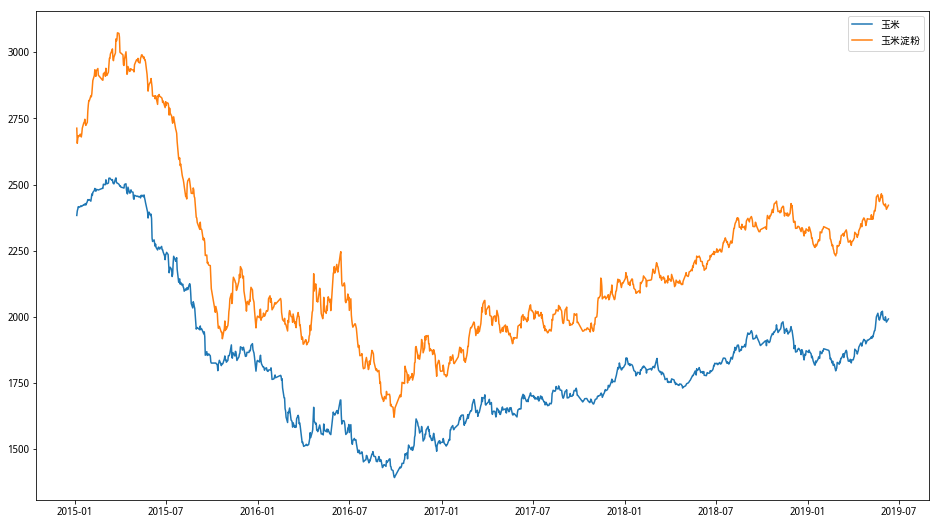

In [5]:
plt.subplots(figsize=(16,9))
plt.plot(price_df.index,price_df.close,label='玉米')
plt.plot(price_df2.index,price_df2.close,label='玉米淀粉')
plt.legend()  # 让图例生效
plt.show()

In [6]:
import statsmodels.api as sm

x = price_df.close
y = price_df2.close
coint_result = sm.tsa.stattools.coint(x, y)
print(coint_result)
pvalue = coint_result[1]
print(pvalue)

X = sm.add_constant(x) 
result = (sm.OLS(y,X)).fit()
print(result)

coef = result.params[1]
print(coef)

(-3.749887402582848, 0.015788157414384156, array([-3.9066283127209394, -3.3418038676377955, -3.0483866634425736]))
0.015788157414384156
1.1560225653747327


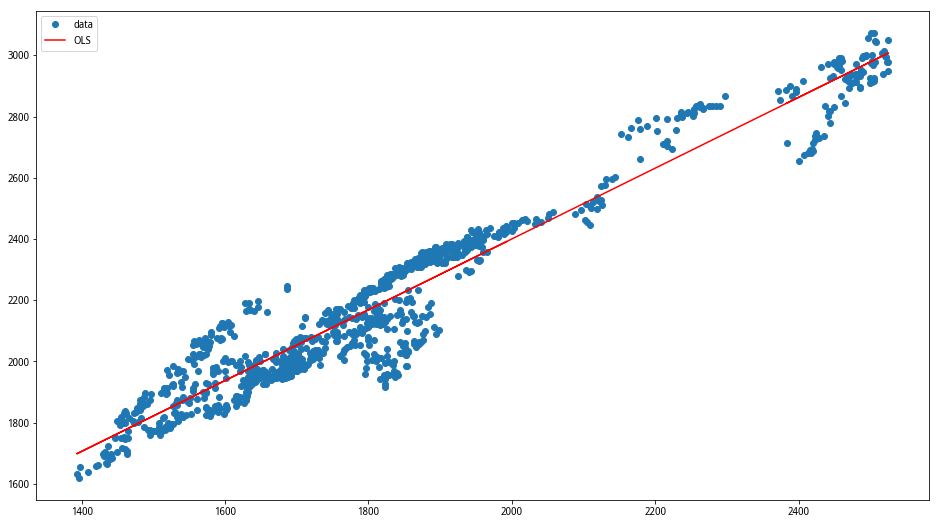

In [14]:
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(x, y, 'o', label="data")
ax.plot(x, result.fittedvalues, 'r', label="OLS")
ax.legend(loc='best')

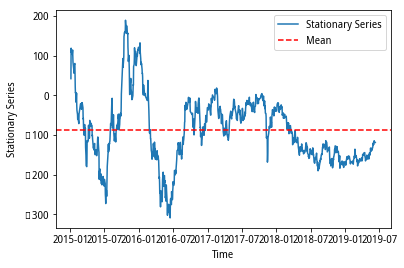

In [8]:
plot(coef*price_df.close-price_df2.close);
plt.axhline((coef*price_df.close-price_df2.close).mean(), color="red", linestyle="--")
plt.xlabel("Time"); plt.ylabel("Stationary Series")
plt.legend(["Stationary Series", "Mean"])

In [9]:
def zscore(series):
    return (series - series.mean()) / np.std(series)

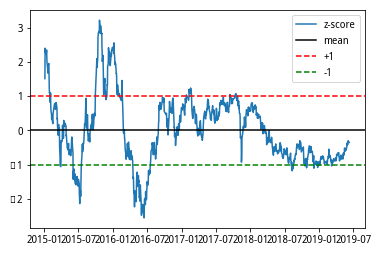

In [15]:
plot(zscore(coef*price_df.close-price_df2.close))
plt.axhline(zscore(coef*price_df.close-price_df2.close).mean(), color="black")
plt.axhline(1.0, color="red", linestyle="--")
plt.axhline(-1.0, color="green", linestyle="--")
# plt.axhline(2.0, color="red", linestyle="--")
# plt.axhline(-2.0, color="green", linestyle="--")
plt.legend(["z-score", "mean", "+1", "-1"])